In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import missingno as mn #missingno had to be installed 'pip install missingno' 
import math
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
#sample = pd.read_csv('sample_submission.csv') not useful


In [3]:
train.index

RangeIndex(start=0, stop=1460, step=1)

In [4]:
train #what do we have? 

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [5]:
# let's start looking at the data, print out colname, type, 

#[print("{} {}".format(col, type(test[col][1]))) for col in columns]

#df.dtypes is much easier way to doing this

train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


In [6]:
train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
                  ...   
BedroomAbvGr       int64
KitchenAbvGr       int64
KitchenQual       object
TotRmsAbvGrd       int64
Functional        object
Fireplaces         int64
FireplaceQu       object
GarageType        object
GarageYrBlt      float64


In [7]:
#split the int and float class from the str classes 

intCols = train.columns[(train.dtypes == 'int64')| (train.dtypes == 'float64')]
strCols = train.columns[train.dtypes == 'object']


In [8]:
dfInt = train[intCols]

In [9]:
dfInt.shape

(1460, 38)

In [10]:
dfStr = train[strCols]

In [11]:
dfStr.shape # we screwed up a bit, we should convert all floats to ints first # fixed this by including float64 to boolean filter

(1460, 43)

In [12]:
dfInt.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

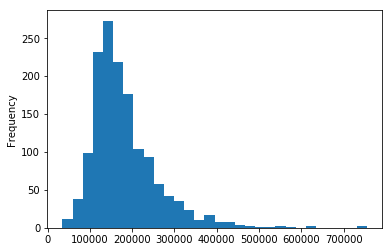

In [13]:
#taking a look at sale price 
train.SalePrice.plot.hist(bins = 30)

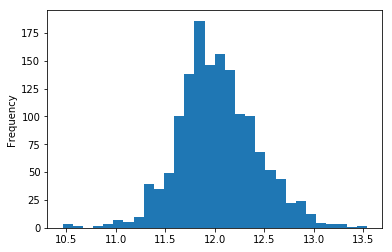

In [14]:
#hist of log of sales price 
train.SalePrice.apply(lambda x: math.log(x)).plot.hist(bins = 30)

In [71]:
# let's start sorting out some missingness starting with Int data
nulls = train.isnull().sum()

In [75]:
nulls = pd.DataFrame(nulls, columns = (['nulls']))
nulls

,nulls
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,259
LotArea,0
Street,0
Alley,1369
LotShape,0
LandContour,0
Utilities,0


In [76]:
nulls.loc[nulls.nulls != 0] # short list of colnames with nuls  

,nulls
LotFrontage,259
Alley,1369
MasVnrType,8
MasVnrArea,8
BsmtQual,37
BsmtCond,37
BsmtExposure,38
BsmtFinType1,37
BsmtFinType2,38
Electrical,1


In [18]:
dfInt.LotFrontage.describe() #where are the missing datas? 

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [19]:
#let's also take a count of how many fields are zeros. may also be missing data
#lots of points are 0 
#nulls = []
#for col in intCols:
    #print((col, sum(dfInt[col] == 0)))
    

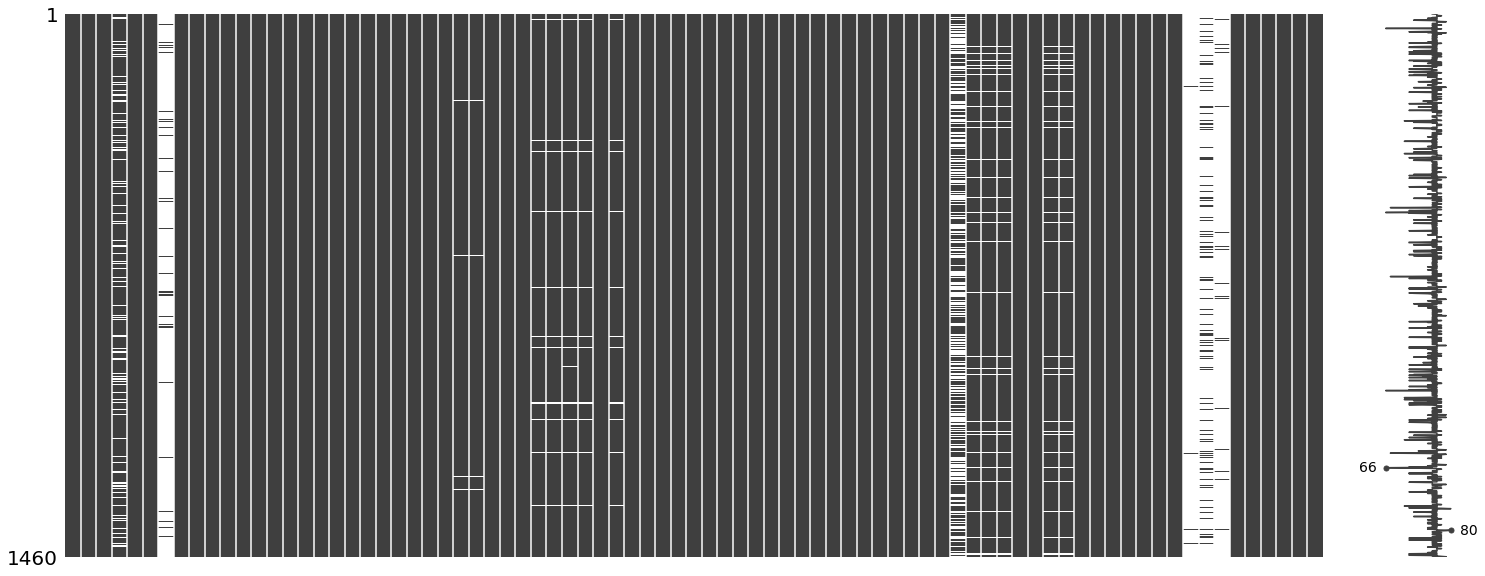

In [20]:
mn.matrix(train)

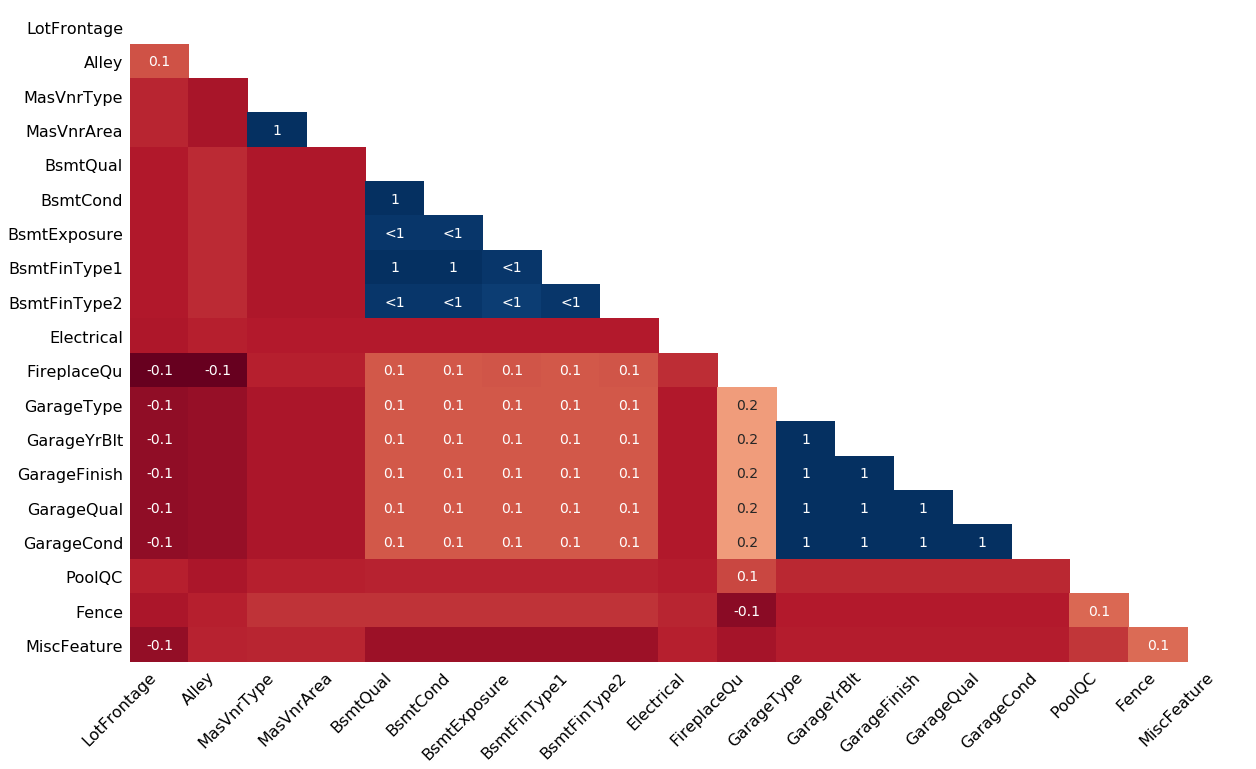

In [21]:
mn.heatmap(train)

In [22]:
#creating category bins for sales price 
dfInt.SalePrice

0       208500
1       181500
2       223500
3       140000
4       250000
5       143000
6       307000
7       200000
8       129900
9       118000
10      129500
11      345000
12      144000
13      279500
14      157000
15      132000
16      149000
17       90000
18      159000
19      139000
20      325300
21      139400
22      230000
23      129900
24      154000
25      256300
26      134800
27      306000
28      207500
29       68500
         ...  
1430    192140
1431    143750
1432     64500
1433    186500
1434    160000
1435    174000
1436    120500
1437    394617
1438    149700
1439    197000
1440    191000
1441    149300
1442    310000
1443    121000
1444    179600
1445    129000
1446    157900
1447    240000
1448    112000
1449     92000
1450    136000
1451    287090
1452    145000
1453     84500
1454    185000
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [23]:
from scipy.stats import binned_statistic

data = dfInt.SalePrice
bin_means = binned_statistic(data, data)[0]

In [24]:
bin_means

array([  86214.08108108,  142361.5560166 ,  208531.19571046,
        281972.4       ,  354766.1372549 ,  425545.57894737,
        499959.25      ,  564838.        ,  618328.5       ,  750000.        ])

In [25]:
np.histogram(dfInt.SalePrice.apply(lambda x: math.log(x)))[1] #histogram of log values. should probably make a separate column of log sales

array([ 10.46024211,  10.7676652 ,  11.07508829,  11.38251138,
        11.68993448,  11.99735757,  12.30478066,  12.61220375,
        12.91962684,  13.22704994,  13.53447303])

In [26]:
#making column of log sales
LogSale = dfInt.SalePrice.apply(lambda x: math.log(x))
#append to train data
train['LogSale'] = LogSale
dfInt['LogSale'] = LogSale

C:\Users\Gardenia\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [27]:
dfInt.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice', 'LogSale'],
      dtype='object')

(array([  5,  12,  54, 184, 470, 400, 220,  90,  19,   6], dtype=int64), array([ 10.46024211,  10.7676652 ,  11.07508829,  11.38251138,
        11.68993448,  11.99735757,  12.30478066,  12.61220375,
        12.91962684,  13.22704994,  13.53447303]))
1460


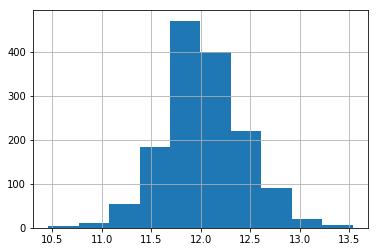

In [50]:
bins = np.histogram(dfInt.LogSale)[1]
bins #creating bins of sales used to help visualize 
train.LogSale.hist() #visualize 
print(np.histogram(train.LogSale)) #print out dist in count and log sale 
print(sum(np.histogram(train.LogSale)[0])) #checking to see if we missed anything

In [29]:
trial = np.digitize(dfInt.LogSale, bins = bins) #selecting bin value according to LogSales

In [30]:
dfInt['SaleBin'] = trial
dfStr['SaleBin'] = trial
train['SaleBin'] = trial

C:\Users\Gardenia\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Gardenia\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [31]:
# using stats.crosstab to set up data for visualization 

Zones = pd.crosstab(train.SaleBin, train.MSZoning, margins = True, normalize = 'index')
Zones

MSZoning,C (all),FV,RH,RL,RM
SaleBin,,,,,
1,0.600000,0.000000,0.000000,0.200000,0.200000
2,0.083333,0.000000,0.000000,0.583333,0.333333
3,0.055556,0.000000,0.055556,0.407407,0.481481
4,0.010870,0.000000,0.010870,0.586957,0.391304
5,0.002128,0.017021,0.019149,0.759574,0.202128
6,0.000000,0.077500,0.005000,0.887500,0.030000
7,0.000000,0.090909,0.000000,0.886364,0.022727
8,0.000000,0.066667,0.000000,0.911111,0.022222
9,0.000000,0.000000,0.000000,0.947368,0.052632


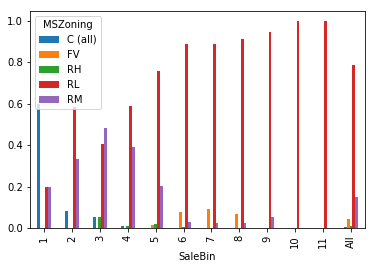

In [33]:
Zones.plot.bar()

In [43]:
# made summary of means in each bin. 
salegroup = train.groupby('SaleBin')
summaryMean = salegroup.agg(['mean'])
summaryMean # since we used mean, it only returns int columns 

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,LogSale
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,...,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
SaleBin,,,,,,,,,,,,,,,,,,,,,
1,589.400000,38.000000,52.000000,7260.800000,2.800000,4.200000,1929.000000,1950.000000,0.000000,109.000000,...,115.400000,57.400000,0.000000,0.000000,0.000000,0.000000,6.800000,2007.800000,37482.200000,10.530103
2,891.333333,40.833333,66.272727,7300.000000,3.500000,4.166667,1935.166667,1961.250000,0.000000,116.333333,...,1.666667,36.000000,0.000000,0.000000,0.000000,296.166667,5.083333,2008.666667,58073.000000,10.967325
3,666.962963,68.425926,54.687500,7017.870370,4.444444,4.962963,1940.648148,1965.259259,25.500000,135.055556,...,9.759259,46.537037,0.000000,0.000000,0.000000,37.222222,6.203704,2008.037037,80620.370370,11.295032
4,719.967391,57.608696,59.530488,7879.739130,4.880435,5.663043,1943.244565,1968.271739,32.646739,203.532609,...,24.413043,37.380435,0.000000,1.521739,0.000000,21.576087,6.195652,2007.826087,106652.010870,11.573655
5,750.263830,58.010638,66.406170,9147.253191,5.423404,5.897872,1960.802128,1977.980851,60.978723,442.119149,...,27.900000,26.595745,2.548936,13.323404,1.021277,61.234043,6.197872,2007.827660,140120.951064,11.846837
6,732.757500,60.650000,70.937908,10244.125000,6.435000,5.440000,1984.122500,1991.830000,99.512690,417.300000,...,54.807500,12.835000,5.065000,19.537500,3.060000,40.825000,6.227500,2007.805000,187018.027500,12.135439
7,741.768182,51.090909,80.732558,14024.427273,7.322727,5.472727,1990.609091,1998.268182,163.191781,540.263636,...,78.468182,14.777273,5.131818,24.045455,8.040909,40.227273,6.763636,2007.722727,251751.413636,12.432721
8,646.666667,46.500000,87.313253,16436.588889,8.311111,5.300000,1996.577778,2002.588889,304.900000,885.477778,...,84.200000,8.111111,6.944444,13.533333,0.000000,0.000000,7.033333,2007.822222,341283.322222,12.736623


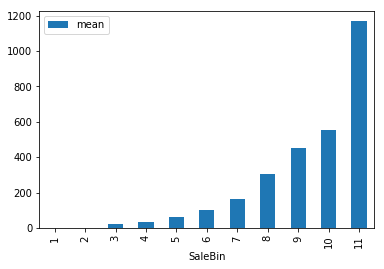

In [51]:
summaryMean.MasVnrArea.plot.bar()

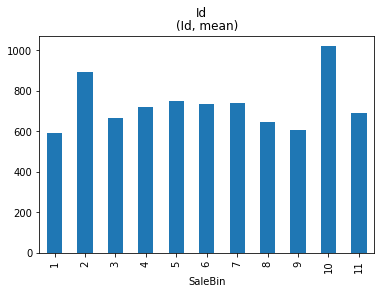

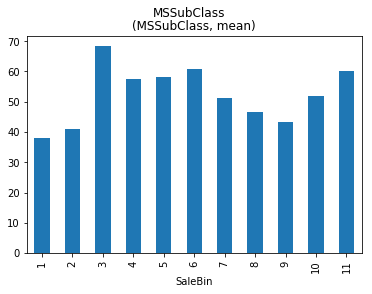

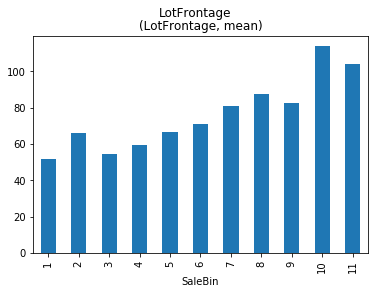

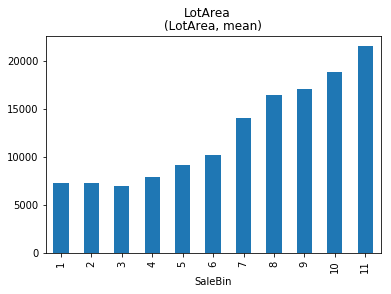

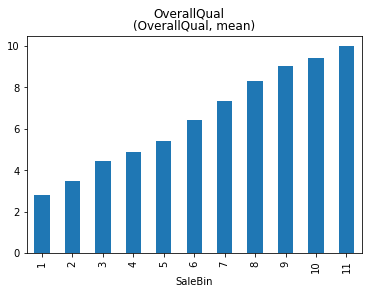

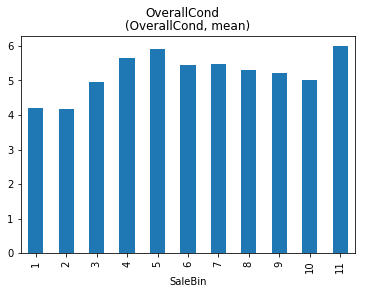

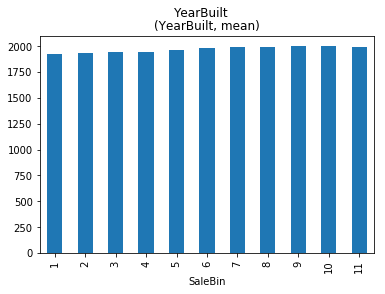

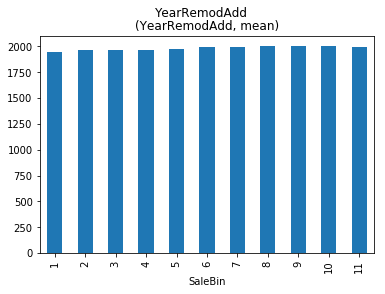

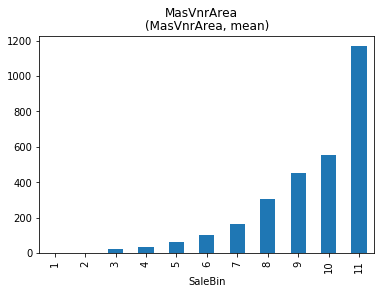

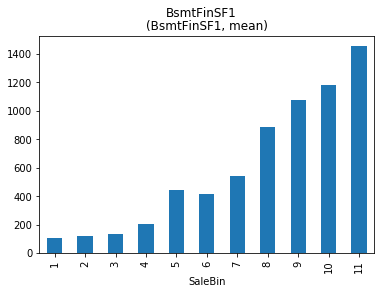

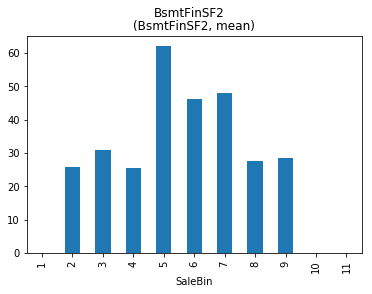

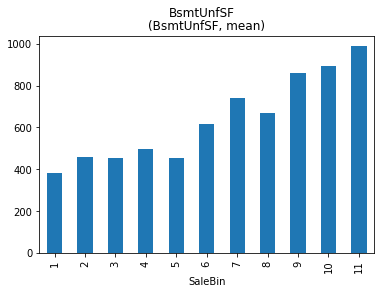

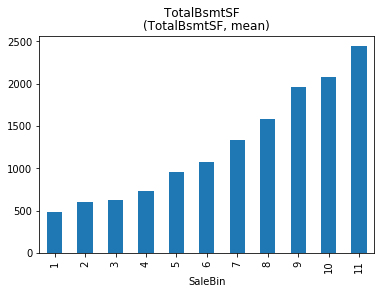

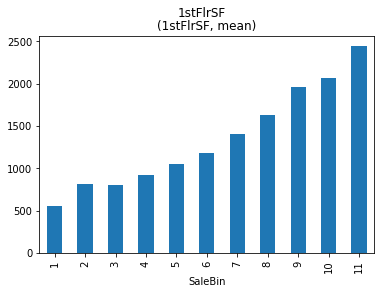

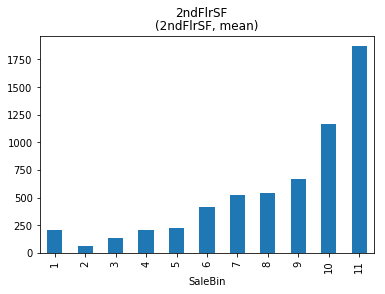

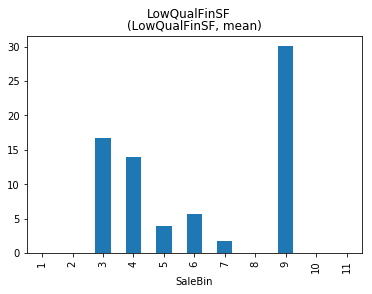

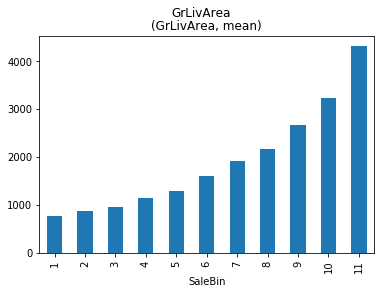

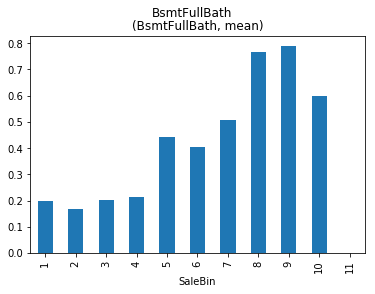

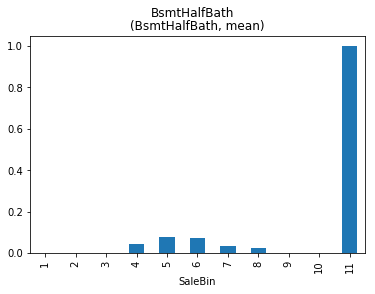

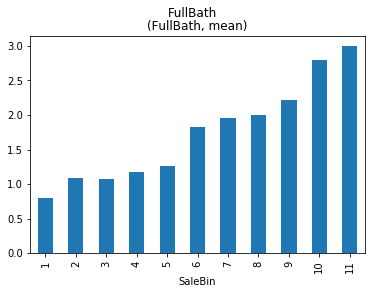

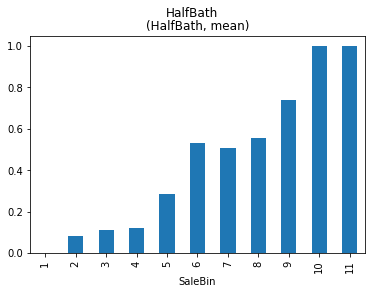

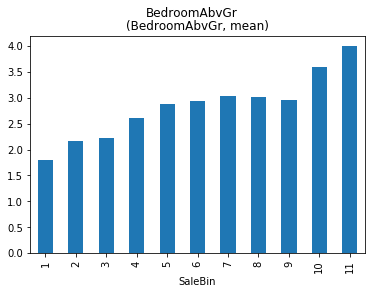

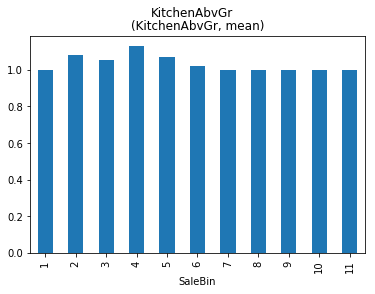

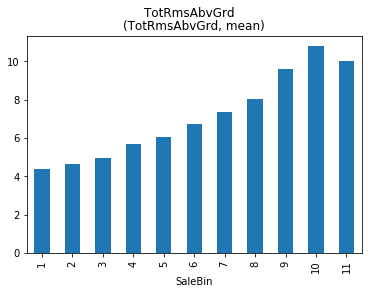

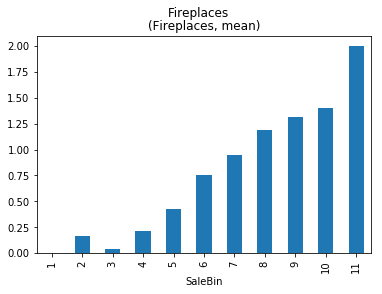

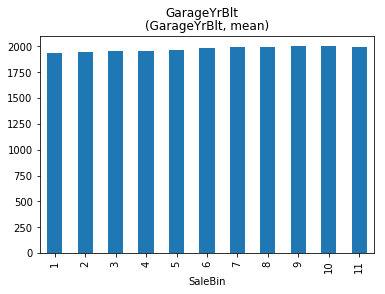

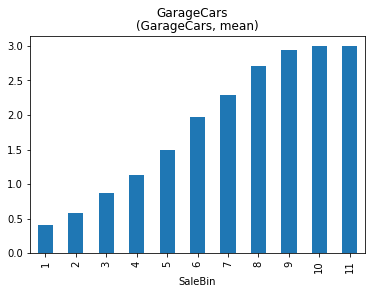

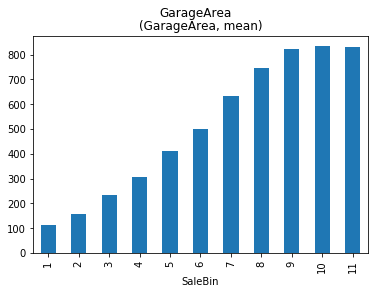

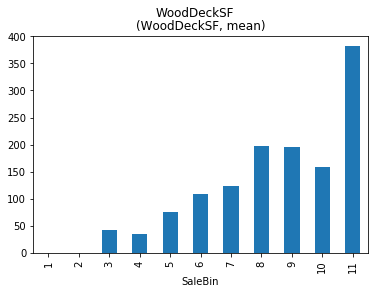

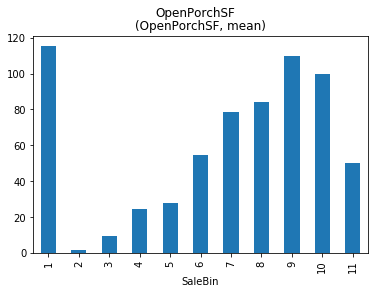

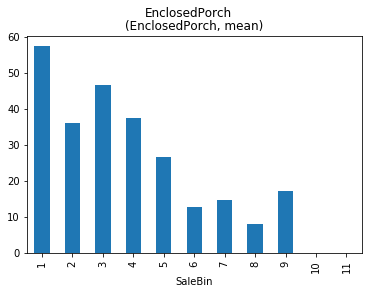

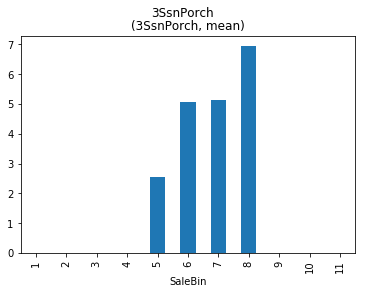

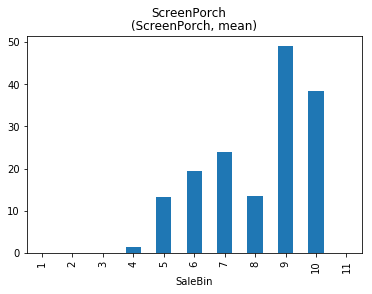

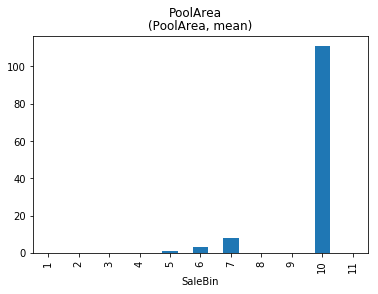

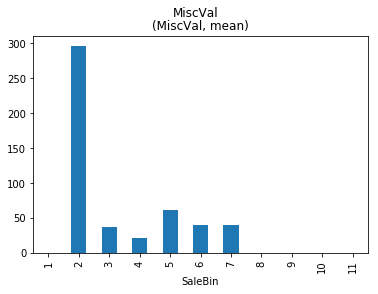

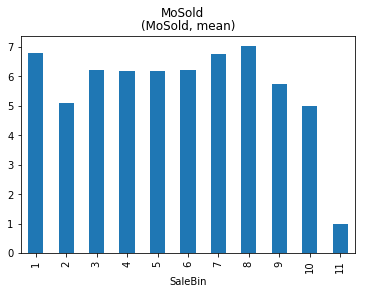

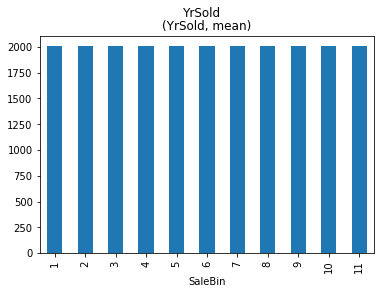

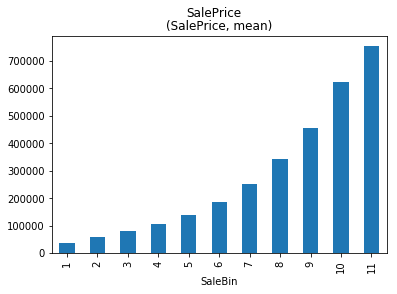

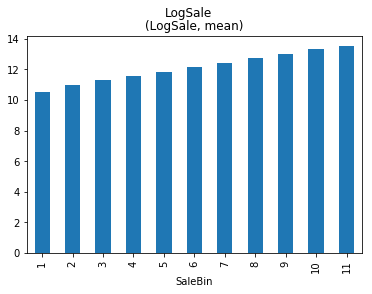

In [65]:
for each in summaryMean.columns:
    plt.show(summaryMean[each].plot(kind = 'bar', title = each[0], subplots = True))

In [66]:
salegroup.agg('count')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LogSale
SaleBin,,,,,,,,,,,,,,,,,,,,,
1,5,5,5,5,5,5,1,5,5,5,...,0,3,0,5,5,5,5,5,5,5
2,12,12,12,11,12,12,3,12,12,12,...,0,2,2,12,12,12,12,12,12,12
3,54,54,54,48,54,54,3,54,54,54,...,0,7,4,54,54,54,54,54,54,54
4,184,184,184,164,184,184,21,184,184,184,...,0,44,7,184,184,184,184,184,184,184
5,470,470,470,389,470,470,33,470,470,470,...,1,148,22,470,470,470,470,470,470,470
6,400,400,400,306,400,400,27,400,400,400,...,2,51,13,400,400,400,400,400,400,400
7,220,220,220,172,220,220,3,220,220,220,...,3,21,6,220,220,220,220,220,220,220
8,90,90,90,83,90,90,0,90,90,90,...,0,3,0,90,90,90,90,90,90,90
9,19,19,19,17,19,19,0,19,19,19,...,0,1,0,19,19,19,19,19,19,19


In [77]:
salegroup.dummy()

AttributeError: 'DataFrameGroupBy' object has no attribute 'dummy'

In [84]:
#will have to give levels to categorical data 